In [1]:
# Libraries
from sympy import lambdify
from sympy.abc import r, theta, phi
from sympy.physics.hydrogen import Psi_nlm
import matplotlib.pyplot as plt
import numpy as np

# Initialization and Declaration
n, l, m = 4, 1, 0
L, N = (1.6 * n) ** 2, 1000
a0, b0 = np.mgrid[-L:L:N*1j, -L:L:N*1j]
nx, ny = a0.shape
PSI = lambdify((r, phi, theta), Psi_nlm(n, l, m, r, phi, theta), 'numpy')

In [2]:
# Calculation
def spherical(x, y, z):
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)    
    theta = np.arctan2(np.sqrt(x ** 2 + y ** 2), z) # the polar angle in radian angles
    phi = np.arctan2(y, x)
    phi[phi < 0] += 2 * np.pi
    return r, theta, phi

cartesian_plane = [
    spherical(a0, b0, 0), # X-Y
    spherical(0, a0, b0), # Y-Z
    spherical(a0, 0, b0), # X-Z
]

r0, theta, phi = cartesian_plane[2]
wavefunction = PSI(r0, phi, theta).reshape(nx, ny)
probability = np.abs(wavefunction)

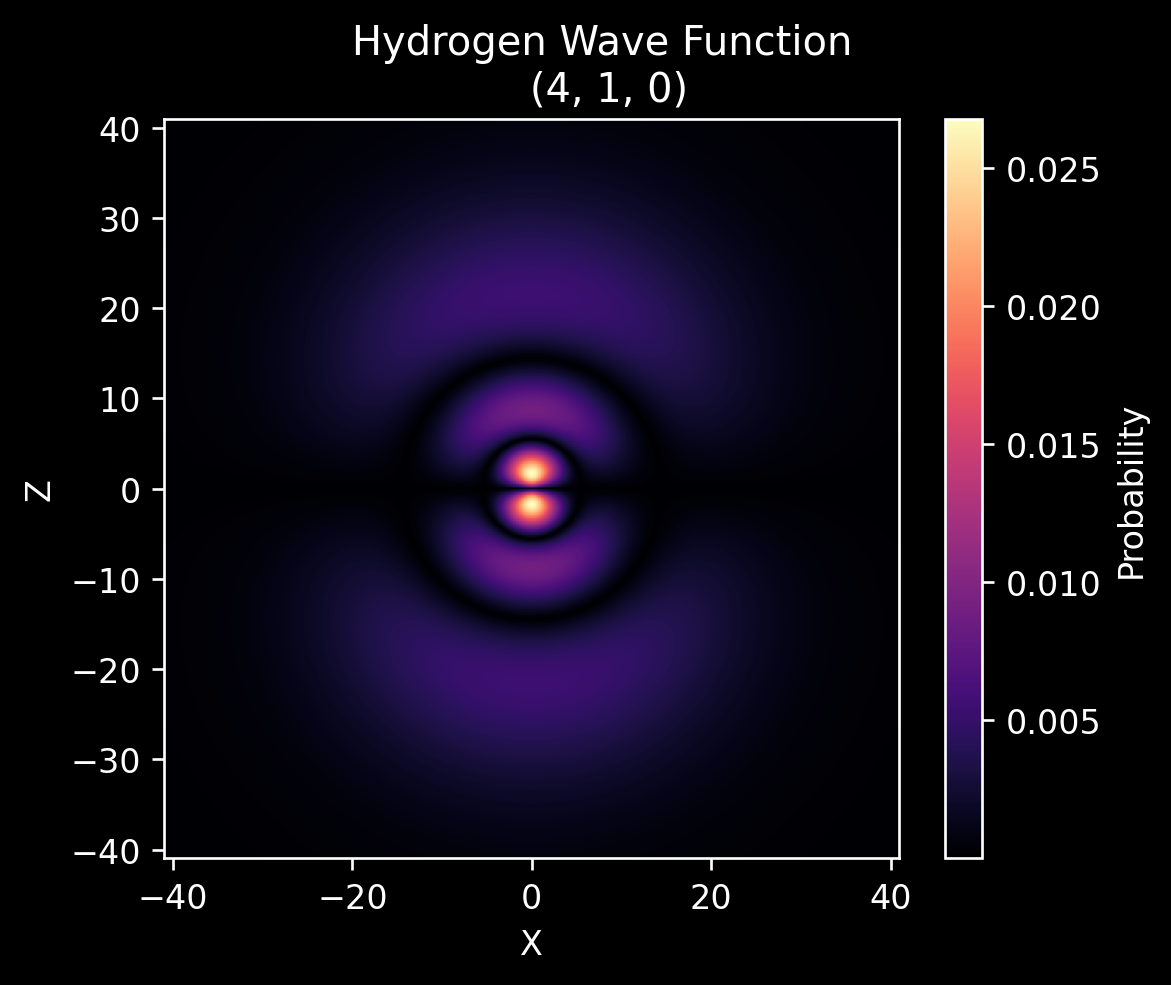

In [3]:
# Visualization
plt.style.use('dark_background')
fig, axes = plt.subplots(figsize = (4.94, 4), dpi = 240)
fig.suptitle(f'Hydrogen Wave Function \n({n}, {l}, {m})', color = 'white')
axes.set_xlim(-L, L)
axes.set_ylim(-L, L)
axes.set_xlabel('X')
axes.set_ylabel('Z')
img = axes.pcolormesh(a0, b0, probability, cmap = 'magma')
cbar = fig.colorbar(img)
cbar.set_label('Probability')
plt.show()